In [2]:
#Add inline magic variable for matplotlib:
%matplotlib inline
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [3]:
#Load the data
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"


In [4]:
#Import data as data frame:
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [5]:
#View the city data first:
city_data_df.head(10)


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [6]:
#View the ride data:
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [7]:
"""Before going further we need to inspect the data and check datatype and check for missing values!!!!"""
ride_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [8]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [ ]:
"""A glance at the metrics shows no null values and the data types appear correct"""

In [13]:
"""However to be more careful lets look in a bit of detail"""
print("City data frame metrics:\n")
print(city_data_df.count())
print("City data frame null counts:\n")
print(city_data_df.isnull().sum())
print("_________")
print("Ride data frame metrics:\n")
print(ride_data_df.count())
print("Ride data frame null counts:\n")
print(ride_data_df.isnull().sum())

City data frame metrics:

city            120
driver_count    120
type            120
dtype: int64
City data frame null counts:

city            0
driver_count    0
type            0
dtype: int64
_________
Ride data frame metrics:

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64
Ride data frame null counts:

city       0
date       0
fare       0
ride_id    0
dtype: int64


In [14]:
"""Based on this data we don't have any null values and the data types are correct.
   Lets check some other metrics"""
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [15]:
"""We see three types of cities. Lets get counts for each"""
print("Urban count:")
print(sum(city_data_df["type"] == "Urban"))
print("Rural Count:")
print(sum(city_data_df["type"] == "Rural"))
print("Suburban Count:")
print(sum(city_data_df["type"] == "Suburban"))

Urban count:
66
Rural Count:
18
Suburban Count:
36


In [16]:
"""Everything looks good so now we can merge our data frames"""
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [17]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [18]:
"""It looks like we should merge on city values since those columns are in both data frames"""
#Lets merge based on with ride_data to the left since it is the larger df:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on =["city", "city"])
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [20]:
"""We want to produce a bubble plot based on average fares vs number of rides delineated based on city type
  with bubble size being related to average number of drivers in each city"""

#Start by creating separate data frames for each city type:
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
# View data frame for at least one city to verify
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [25]:
#Now we want to get the total number of rides per city in order to compute some averages:
#Starting with urban cities:
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']

In [26]:
#Now lets do the same for the other two cities:
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [27]:
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']

In [31]:
#Now lets get the average fare for each city type:
rural_average_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_average_fare

city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

In [32]:
#Now we do the same for the other city types:
urban_average_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_average_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

In [33]:
#Now we need the average number of drivers for each city in each city type:
urban_average_drivers_by_city = urban_cities_df.groupby(["city"]).mean()["driver_count"]

In [34]:
urban_average_drivers_by_city

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [35]:
suburban_average_drivers_by_city = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_average_drivers_by_city = rural_cities_df.groupby(["city"]).mean()["driver_count"]


In [36]:
urban_average_drivers_by_city

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

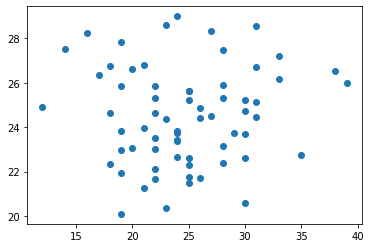

In [37]:
#We now have the data we need to create a bubble chart:
#Lets start by creating a scatter plot for urban cities:
plt.scatter(urban_ride_count, urban_average_fare)

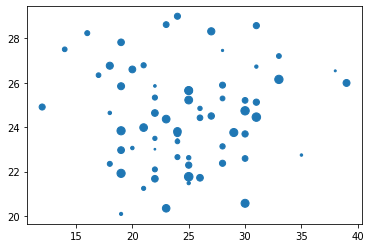

In [38]:
#Not very informative so lets add more to this by changing bubble size based on number of drivers:
plt.scatter(urban_ride_count, urban_average_fare, s=urban_average_drivers_by_city)

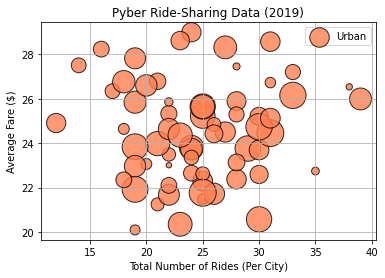

In [41]:
#This helps but now we need to annotate this to be more complete:
plt.scatter(urban_ride_count, urban_average_fare,
            s=urban_average_drivers_by_city*10,
            edgecolor = 'k',
            alpha=0.8,
            label="Urban",
           color = "coral")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()
plt.legend()
plt.show()

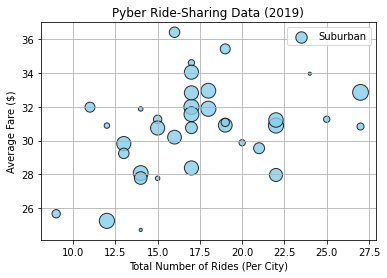

In [42]:
#This looks a bit better so now we do the same for the other city types but change the color:
#This helps but now we need to annotate this to be more complete:
plt.scatter(suburban_ride_count, suburban_average_fare,
            s=suburban_average_drivers_by_city*10,
            edgecolor = 'k',
            alpha=0.8,
            label="Suburban",
           color = "skyblue")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()
plt.legend()
plt.show()

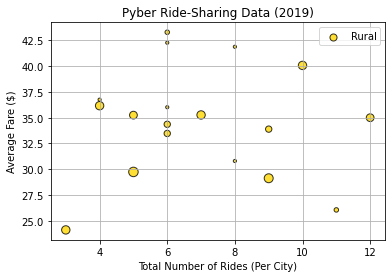

In [43]:
#And lets do the same for the rural cities:
plt.scatter(rural_ride_count, rural_average_fare,
            s=rural_average_drivers_by_city*10,
            edgecolor = 'k',
            alpha=0.8,
            label="Rural",
           color = "gold")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()
plt.legend()
plt.show()

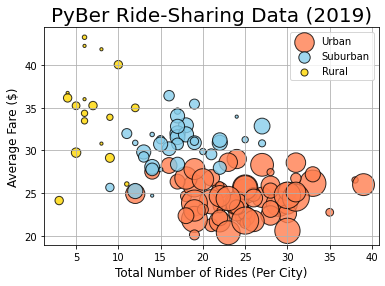

In [46]:
#Now we can combine these into a single chart
#To do this we add multiple methods to our plot object in a single cell:
plt.scatter(urban_ride_count, urban_average_fare,
            s=urban_average_drivers_by_city*10,
            edgecolor = 'k',
            alpha=0.8,
            label="Urban",
           color = "coral")
plt.scatter(suburban_ride_count, suburban_average_fare,
            s=suburban_average_drivers_by_city*10,
            edgecolor = 'k',
            alpha=0.8,
            label="Suburban",
           color = "skyblue")
plt.scatter(rural_ride_count, rural_average_fare,
            s=rural_average_drivers_by_city*10,
            edgecolor = 'k',
            alpha=0.8,
            label="Rural",
           color = "gold")
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
plt.legend()
# Show the plot


plt.show()

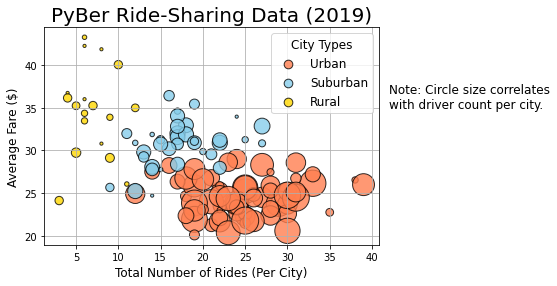

<Figure size 432x288 with 0 Axes>

In [55]:
#The legend is a little messed up so we need to correct this:
plt.scatter(urban_ride_count, urban_average_fare,
            s=urban_average_drivers_by_city*10,
            edgecolor = 'k',
            alpha=0.8,
            label="Urban",
           color = "coral")
plt.scatter(suburban_ride_count, suburban_average_fare,
            s=suburban_average_drivers_by_city*10,
            edgecolor = 'k',
            alpha=0.8,
            label="Suburban",
           color = "skyblue")
plt.scatter(rural_ride_count, rural_average_fare,
            s=rural_average_drivers_by_city*10,
            edgecolor = 'k',
            alpha=0.8,
            label="Rural",
           color = "gold")
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
plt.legend()
lgnd = plt.legend(fontsize ="12", mode = "Expanded", scatterpoints=1, loc="best", title = "City Types")
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)
plt.text(42,35, "Note: Circle size correlates\nwith driver count per city.", fontsize="12") #The first two numbers determine the location of the text based on pixel coordinates
plt.show()
#Now we can save it
plt.savefig("analysis/Fig1.png")

In [56]:
#Now lets do some statistical analysis on the data:
#Get summary stats:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [58]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [59]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [60]:
#We can also do this for our series data:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [61]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [62]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [63]:
#If we want just the mean we can also use the built in mean function:
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [65]:
#We can use the built in median fucntion as well:
print(urban_ride_count.median(), suburban_ride_count.median(), rural_ride_count.median())

24.0 17.0 6.0


In [66]:
#We can also get the mode(s) for data using a similar procedure:
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [67]:
suburban_ride_count.mode()

0    17
dtype: int64

In [68]:
#We can also use NumPy and SciPy 
import scipy.stats as sts
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)  #Note the use of scipy here which returns mode AND count
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [69]:
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)  #Note the use of scipy here which returns mode AND count
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [70]:
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)  #Note the use of scipy here which returns mode AND count
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [71]:
#Now lets get summary stats for the average fare for each city type
#For this we need to focus on the fare column for each city type data frame; for example:
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [72]:
#Create a series for each city
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [73]:
#Now we can extract the desired data:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [75]:
#We likewise can do the same for the other two city types:
# Calculate the measures of central tendency for the average fare for the suburban cities.
suburban_fares =  suburban_cities_df["fare"]
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

print("________________")
# Calculate the measures of central tendency for the average fare for the rural cities.
rural_fares =  rural_cities_df["fare"]
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")



The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).
________________
The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [77]:
#We can likewise perform similar stats on number of drivers based on city type:
#Starting with the Urban drivers:
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']
#check the urban drivers series
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [81]:
#Now we can calculate the same summary stats:
mean_suburban_drivers = round(np.mean(suburban_drivers),0)
print(f"The mean number of drivers for suburban trips is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers for suburban trips is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of drivers for suburban trips is {mode_suburban_drivers}.")

print("________________")


mean_rural_drivers = round(np.mean(rural_drivers),0)
print(f"The mean number of drivers for rural trips is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers for rural trips is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of drivers for rural trips is {mode_rural_drivers}.")

print("________________")


mean_urban_drivers = round(np.mean(urban_drivers),0)
print(f"The mean number of drivers for urbantrips is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers for urbantrips is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers for urbantrips is {mode_urban_drivers}.")

The mean number of drivers for suburban trips is 14.00.
The median number of drivers for suburban trips is 16.00.
The mode number of drivers for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).
________________
The mean number of drivers for rural trips is 4.00.
The median number of drivers for rural trips is 4.00.
The mode number of drivers for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).
________________
The mean number of drivers for urbantrips is 37.00.
The median number of drivers for urbantrips is 37.00.
The mode number of drivers for urbantrips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


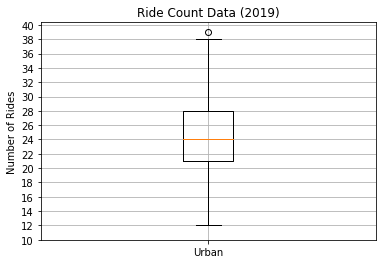

In [82]:
#A good way to visualie measures of central tendency is to use boxplots
#Lets do this for the Urban ride count data:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

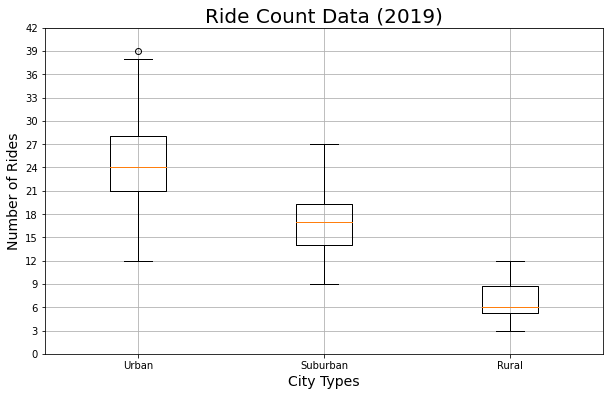

In [94]:
#Lets do this for all three city types and place them in one plot together:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [84]:
"""The urban cities have an outlier of 39. If we want to see which cities had that value we can 
  use boolean logic on our Urban data series and count 'True' values """
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


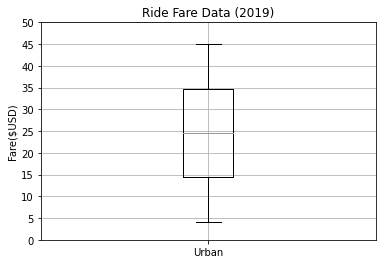

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [85]:
#Now we can do the same for the ride fare data starting with the Urban data:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

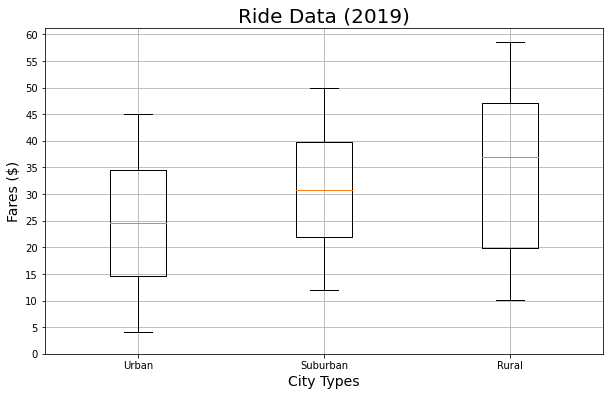

In [95]:
#And like before we can create a figure with all three boxplots:
x_labels = ["Urban", "Suburban","Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Data (2019)',fontsize=20)
ax.set_ylabel('Fares ($)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

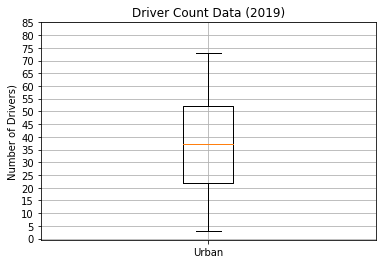

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [91]:
#Lets do the same for the driver count data:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

In [93]:
urban_drivers

0        5
1       72
2       57
3       34
4       46
        ..
1620    67
1621    41
1622    11
1623     3
1624    57
Name: driver_count, Length: 1625, dtype: int64

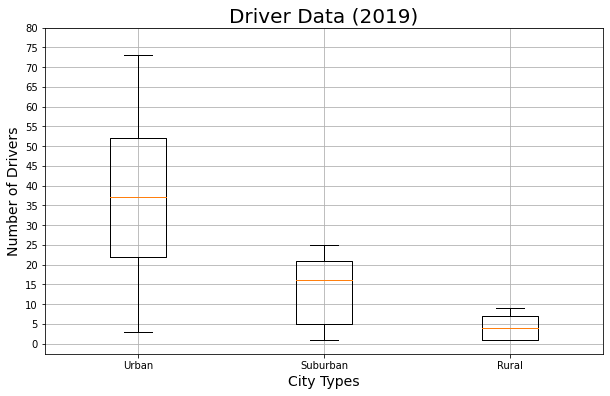

In [98]:
#And again lets do it for all three city types
x_labels = ["Urban", "Suburban","Rural"]
ride_driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_driver_data, labels=x_labels)
ax.set_yticks(np.arange(0, 81, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()